In [ ]:
# Regression Problem: output is numerical in nature
# simple regression: where output is based on single feature, year vs gdp
# multiple linear regression: features are multiple
# House price prediction: house age, sq feet,
# int, float
# Rainfall prediction
# Sales Prediction
# revenue prediction
# GDP
# Stock price prediction
# Classifaction Problem
  # Binary class: Only Two class
    # Yes/No
    # True/False
    # 1/0
    # Insurance buy or not
    # Disease cancer classification: yes / no
    # Rainfall prediction: yes/no
    # Credit card :
    # Stock buy: yes/no
    # sentiment analysis: reviews analysis: +ve | -ve
    # SPAM: mail: yes or not
  # Multiclass classification
    # More than two classification
    # Image segementation
    # Facial classifcation
    # Flowers class
    # Moviews Recommendation
    # Digits Classification
    # Image classification

In [ ]:
# Classification Problem:
# Binary Class: 0/1, True. False

# Project Objective: Build ML Model that predict customer buy Insurance or not

# Step 1: Import all important modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, root_mean_squared_error
from sklearn.model_selection import train_test_split
import os
import warnings
warnings.filterwarnings('ignore')
print('All Modules Loaded Successfully!!')

All Modules Loaded Successfully!!


# LogisticRegression: It mainly use for classification problems: Binary

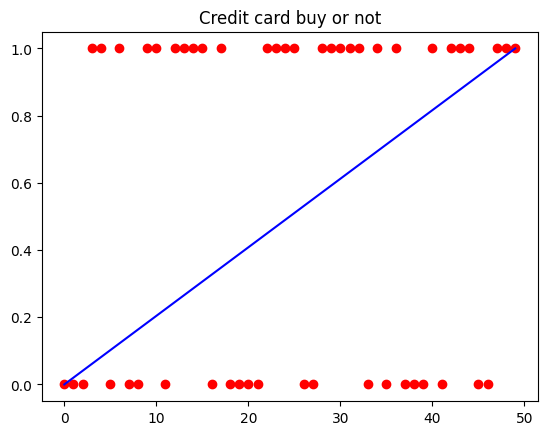

In [ ]:
y = np.random.randint(0,2,50)
x = range(0,50)
line_data = np.linspace(0,1,50)

# zero: not interested, # 1: interested
plt.title('Credit card buy or not')
plt.scatter(x,y, color = 'r')
plt.plot(line_data, color ='b')
plt.show()

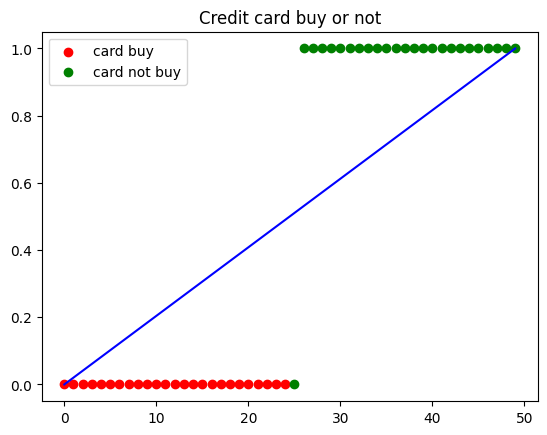

In [ ]:
y = []
for i in range(50):
  if i <= 25:
    y.append(0)
  else:
    y.append(1)
x = range(0,50)
line_data = np.linspace(0,1,50)

# zero: not interested, # 1: interested
plt.title('Credit card buy or not')
plt.scatter(x[:25],y[:25], color = 'r', label = 'card buy')
plt.scatter(x[25:],y[25:], color = 'g', label = 'card not buy')
plt.plot(line_data, color ='b')
plt.legend()
plt.show()

In [ ]:
def sigmoid_func(x):
  return (1/(1+ np.e**(-x)))
  # It returns s-curve
  # It never touches 1, 0

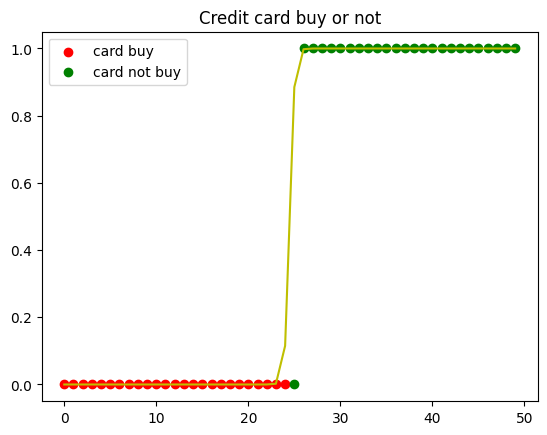

In [ ]:
line_data = np.linspace(-100,100,50)
s_curve = sigmoid_func(line_data)

plt.title('Credit card buy or not')
plt.scatter(x[:25],y[:25], color = 'r', label = 'card buy')
plt.scatter(x[25:],y[25:], color = 'g', label = 'card not buy')
# plt.plot(line_data, color ='b')
plt.plot(s_curve, color ='y')

plt.legend()
plt.show()

In [ ]:
min(s_curve)

np.float64(3.7200759760208555e-44)

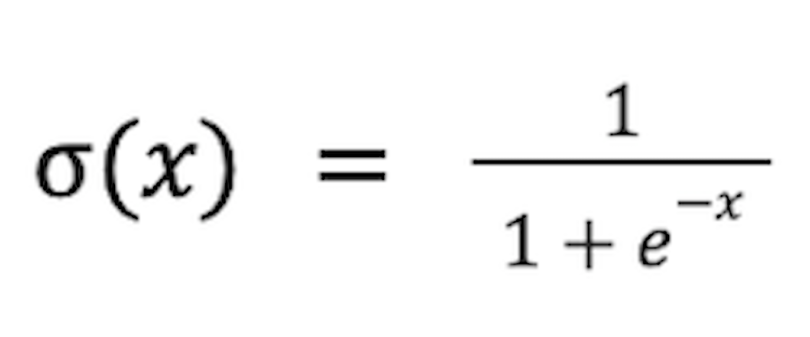

In [ ]:
np.e

2.718281828459045

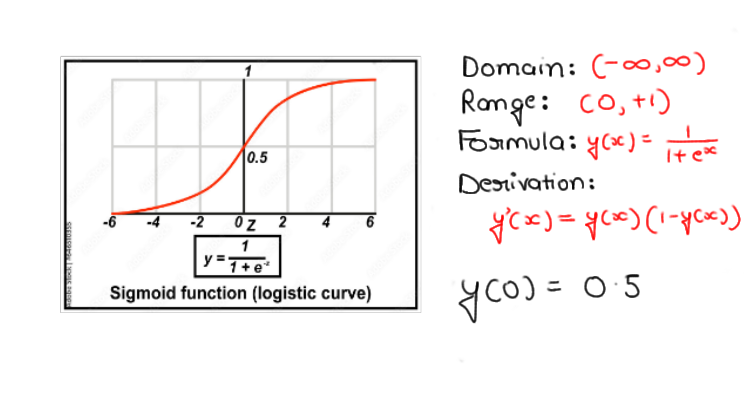

In [ ]:
# Dataset link:https://drive.google.com/file/d/1fH-Lmfy4LGMR7EWO8HocRpz93U7rNChi/view?usp=sharing

# Step 2: Load DataSet

In [ ]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vROfD2r_s22Yfo_x3V3nMXXFJYaeDR9wUSU4ha9t57gmNscSnv6R-GyaDDBbh0HaXYDo1cVpL9UHBT1/pub?output=csv'
print(url)

https://docs.google.com/spreadsheets/d/e/2PACX-1vROfD2r_s22Yfo_x3V3nMXXFJYaeDR9wUSU4ha9t57gmNscSnv6R-GyaDDBbh0HaXYDo1cVpL9UHBT1/pub?output=csv


In [ ]:
df = pd.read_csv(url)
df.sample(2)

,age,gender,salary,credit_score,previous_claim,marital_status,insurance_bought
42,44,Male,66000,760,0,Married,1
53,36,Female,49500,690,0,Married,1


In [ ]:
df.shape

(85, 7)

In [ ]:
df.head(5)

,age,gender,salary,credit_score,previous_claim,marital_status,insurance_bought
0,22,Male,28000,580,0,Single,0
1,23,Female,30000,590,0,Single,0
2,24,Male,31000,600,0,Single,0
3,25,Female,32000,605,1,Single,0
4,26,Male,33000,610,0,Single,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               85 non-null     int64 
 1   gender            85 non-null     object
 2   salary            85 non-null     int64 
 3   credit_score      85 non-null     int64 
 4   previous_claim    85 non-null     int64 
 5   marital_status    85 non-null     object
 6   insurance_bought  85 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 4.8+ KB


In [ ]:
df.columns

Index(['age', 'gender', 'salary', 'credit_score', 'previous_claim',
       'marital_status', 'insurance_bought'],
      dtype='object')

In [ ]:
df.sample(5)

,age,gender,salary,credit_score,previous_claim,marital_status,insurance_bought
54,37,Male,51500,700,0,Married,1
66,34,Male,45500,670,1,Married,1
37,39,Male,56000,720,0,Married,1
44,46,Male,70000,780,1,Married,1
67,35,Female,47500,680,0,Married,1


In [ ]:
df.isna().sum()

,0
age,0
gender,0
salary,0
credit_score,0
previous_claim,0
marital_status,0
insurance_bought,0


In [ ]:
# ETL: Extract, Transform, Load
# ELT: Extract , Load, Transform
# ETLT: Extract, transform, Load, Transform

In [ ]:
df.describe().round()

,age,salary,credit_score,previous_claim,insurance_bought
count,85.0,85.0,85.0,85.0,85.0
mean,36.0,51706.0,699.0,0.0,1.0
std,8.0,14148.0,66.0,0.0,0.0
min,22.0,28000.0,580.0,0.0,0.0
25%,31.0,40500.0,650.0,0.0,0.0
50%,36.0,50000.0,695.0,0.0,1.0
75%,42.0,61500.0,745.0,1.0,1.0
max,52.0,82000.0,840.0,1.0,1.0


In [ ]:
df.describe(include='object')
# instances, Rows, records

,gender,marital_status
count,85,85
unique,2,2
top,Male,Married
freq,43,59


In [ ]:
text_columns = df.select_dtypes('object').columns
text_columns

Index(['gender', 'marital_status'], dtype='object')

In [ ]:
num_columns = df.select_dtypes('number').columns
num_columns

Index(['age', 'salary', 'credit_score', 'previous_claim', 'insurance_bought'], dtype='object')

In [ ]:
# text_analysis

for i in text_columns:
  display(df[i].value_counts())

,count
gender,
Male,43
Female,42


,count
marital_status,
Married,59
Single,26


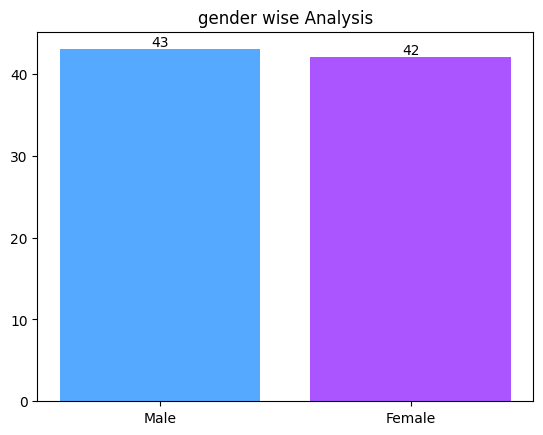

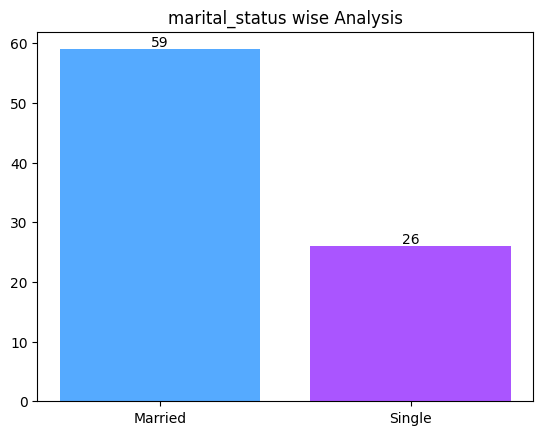

In [ ]:
for i in text_columns:
  x = df[i].value_counts().index
  y = df[i].value_counts().values
  plt.title(f'{i} wise Analysis')
  ax = plt.bar(x,y, color = sns.color_palette('cool',2))
  plt.bar_label(ax)
  plt.show()

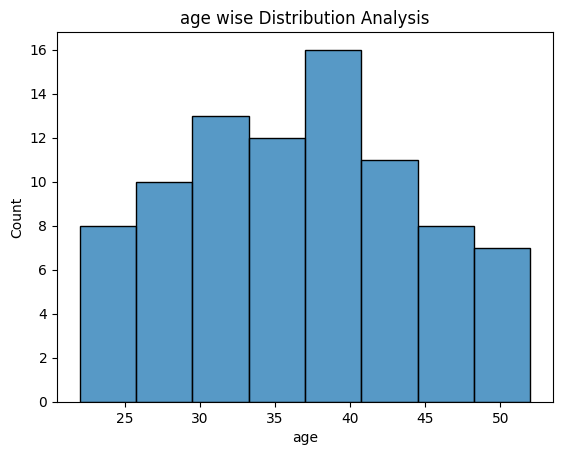

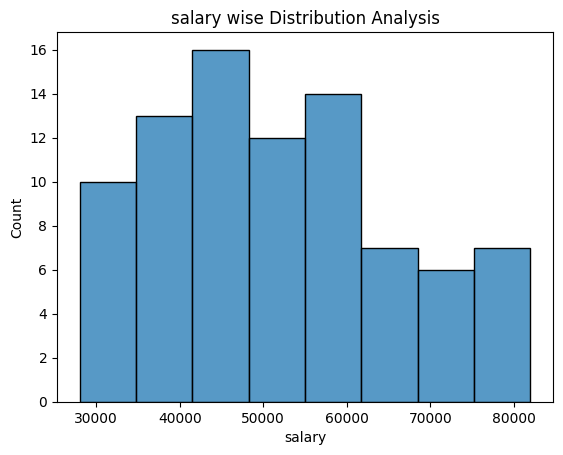

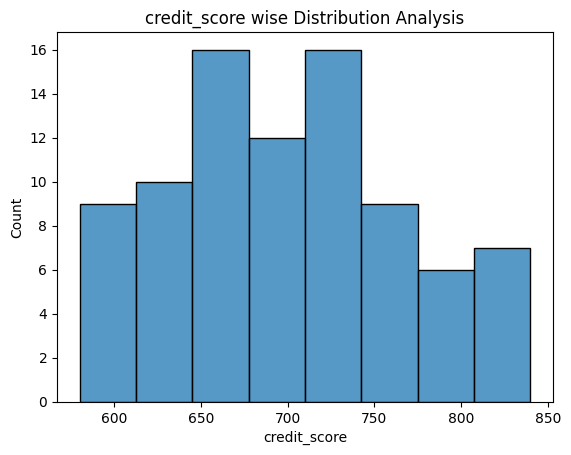

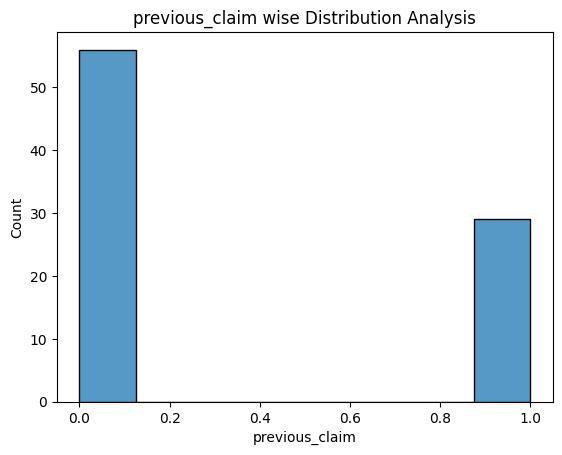

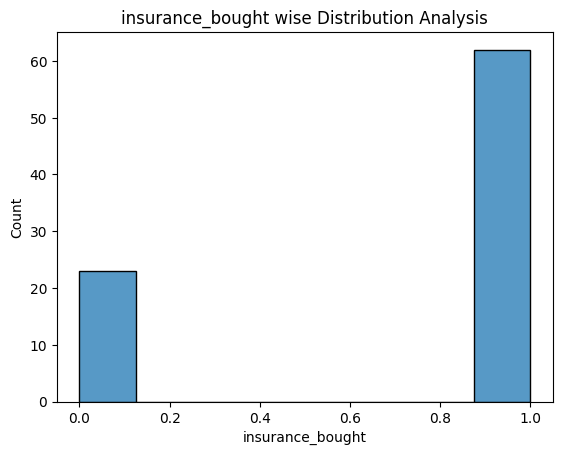

In [ ]:
# Num distribution analysis

for i in num_columns:
  plt.title(f'{i} wise Distribution Analysis')
  sns.histplot(df[i])
  plt.show()

In [ ]:
df.corr(numeric_only=True).round(2)

,age,salary,credit_score,previous_claim,insurance_bought
age,1.00,1.00,1.00,-0.07,0.76
salary,1.00,1.00,1.00,-0.08,0.72
credit_score,1.00,1.00,1.00,-0.08,0.73
previous_claim,-0.07,-0.08,-0.08,1.00,-0.06
insurance_bought,0.76,0.72,0.73,-0.06,1.00


In [ ]:
# Feature Engineering: A technique to Convert textual data to numerical one

In [ ]:
# OneHOTEncoding, pd.get_dummies
# Label Encoder
# Ordinal Encoding
# map: lambda, apply_map(dict)

In [ ]:
df['gender'] = df['gender'].map({'Male':1,'Female':0})

In [ ]:
df.sample()

,age,gender,salary,credit_score,previous_claim,marital_status,insurance_bought
0,22,1,28000,580,0,Single,0


In [ ]:
df['marital_status'].unique()

array(['Single', 'Married'], dtype=object)

In [ ]:
df['marital_status'] = df['marital_status'].apply(lambda row: 1 if row == 'Single' else 0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               85 non-null     int64
 1   gender            85 non-null     int64
 2   salary            85 non-null     int64
 3   credit_score      85 non-null     int64
 4   previous_claim    85 non-null     int64
 5   marital_status    85 non-null     int64
 6   insurance_bought  85 non-null     int64
dtypes: int64(7)
memory usage: 4.8 KB


In [ ]:
df.corr().round(2).iloc[:,-1]

,insurance_bought
age,0.76
gender,0.03
salary,0.72
credit_score,0.73
previous_claim,-0.06
marital_status,-0.92
insurance_bought,1.00


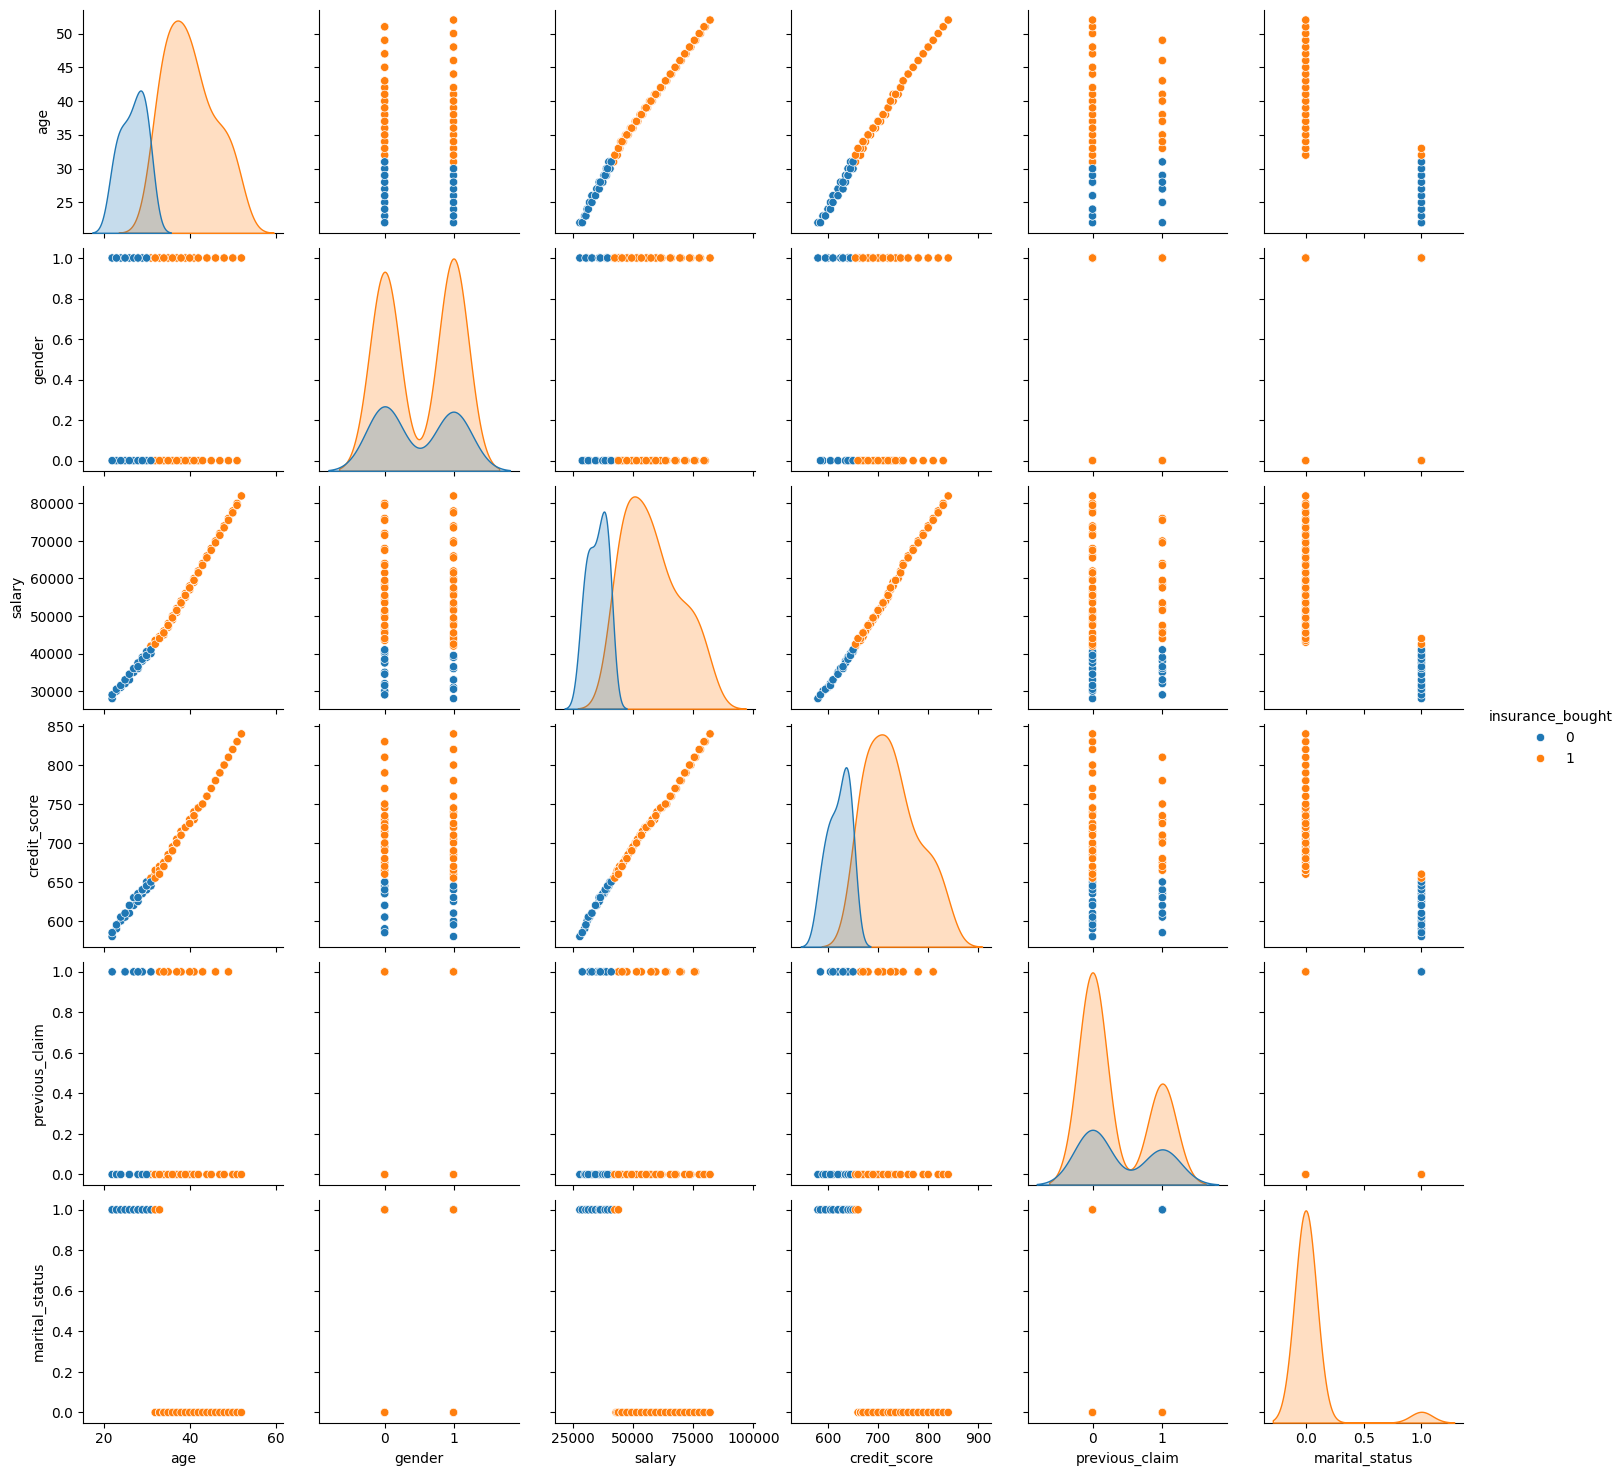

In [ ]:
sns.pairplot(df, hue = 'insurance_bought')
plt.show()

# Step 4: Model Building

In [ ]:
# Features vs target
X = df.iloc[:,:-1]
X

,age,gender,salary,credit_score,previous_claim,marital_status
0,22,1,28000,580,0,1
1,23,0,30000,590,0,1
2,24,1,31000,600,0,1
3,25,0,32000,605,1,1
4,26,1,33000,610,0,1
...,...,...,...,...,...,...
80,48,1,73500,800,0,0
81,49,0,75500,810,1,0
82,50,1,77500,820,0,0
83,51,0,79500,830,0,0


In [ ]:
y = df.iloc[:,-1]
y

,insurance_bought
0,0
1,0
2,0
3,0
4,0
...,...
80,1
81,1
82,1
83,1


In [ ]:
# 4.2 #training and testing part
# un-packing
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
a,b,c,d = [2,3,4,5]
# un-packing


In [ ]:
# 4.3: model
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
y_test.values

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# Training accuracy
model.score(X_train,y_train)

1.0

In [ ]:
# Testing Accuracy
model.score(X_test,y_test)

1.0

In [ ]:
# When we can get -ve accuracy?

In [ ]:
# Binary Classification
# in Linear Regression: MSE, MAE, RMSE, R2_Score, Adjusted_r2_score
# in Logistic Regression or any classifcation: Specificity_score,Accuracy-Score, Sensitivity_score/Recall_score, Precision_Score, f1_score, confusion_matrix,classification_matrix

In [ ]:
# confusion_matrix

In [ ]:
# Actual Answer         Model Answer
#   yes                     yes     : right output
#   yes                     no    :   wrong output
#   no                      yes  :   wrong output
#   no                      no   : right output

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report, f1_score
print('Done')

Done


In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 5,  0],
       [ 0, 12]])

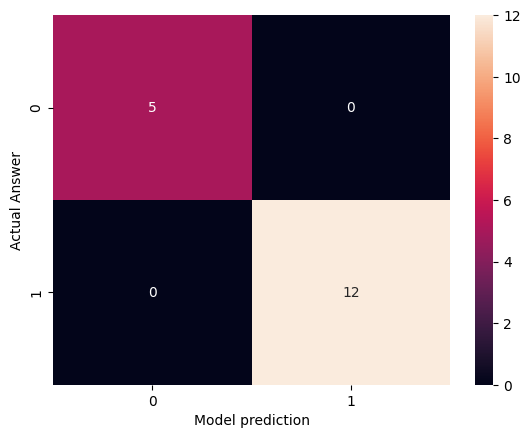

In [ ]:
sns.heatmap(cm, annot = True)
plt.xlabel('Model prediction')
plt.ylabel('Actual Answer')
plt.show()

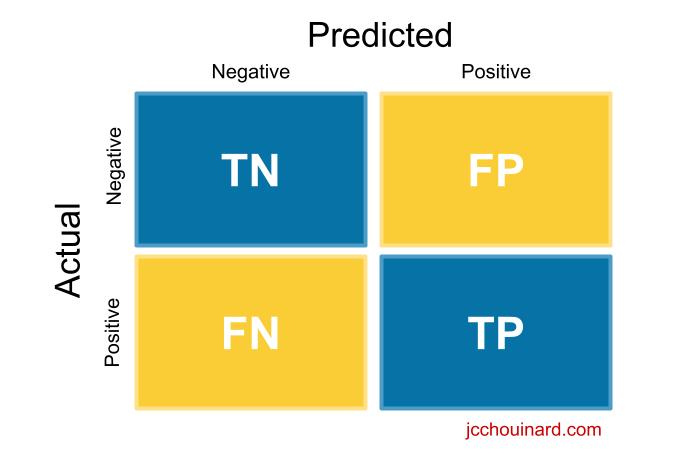

In [ ]:
# True Positive, TP, TN: True Negative
# FN: false negative, FP: false Positive

In [ ]:
cm

array([[ 5,  0],
       [ 0, 12]])

In [ ]:
cm.flatten()

array([ 5,  0,  0, 12])

In [ ]:
TN,FP,FN,TP = cm.flatten()

In [ ]:
# accuracy Score:
acc_score = (TN + TP)/(TN + FP + FN + TP)
print('Accuracy Score is: ',acc_score)

Accuracy Score is:  1.0


In [ ]:
accuracy_score(y_test,y_pred)

1.0

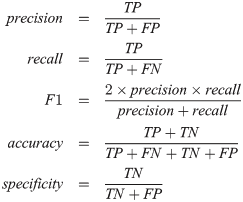

In [ ]:
# Acutal        # Model prediction
# yes           # yes        # Perfect One
# yes           # no     # Type 1 Error: is very bad for Model
# no            # yes    # Type 2 Error:
# no            # no         # perfect One

In [ ]:
pre_score = TP /(TP+FP)
print(pre_score)

1.0


In [ ]:
rec_score = TP/(TP + FN)
print(rec_score)

1.0


In [ ]:
recall_score(y_test,y_pred)

1.0

In [ ]:
spec_score = TN/(TN + FP)
print(spec_score)

1.0


In [ ]:
F1 = (2 * pre_score * rec_score)/(pre_score + rec_score)
F1

np.float64(1.0)

In [ ]:
f1_score(y_test,y_pred)

1.0

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        12

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17



In [ ]:
X.columns

Index(['age', 'gender', 'salary', 'credit_score', 'previous_claim',
       'marital_status'],
      dtype='object')

In [ ]:
def predict_insurance(name):

  age = float(input('Enter your age (18-60): '))
  gender = int(input('Enter your gender (Male:1, Female:0): '))
  salary = float(input('Enter your salary: '))
  credit_score = int(input('Enter Credit Score: '))
  previous_claim = int(input('Enter claim status (0/1): '))
  ms = int(input('Enter marital Status (0/1): '))

  user_input = [[age,gender,salary,credit_score,previous_claim,ms]]
  ans = model.predict(user_input)[0]
  pp = round(model.predict_proba(user_input).max() * 100,2)
  if ans == 1:
    print(f'{name} will buy the Insurance with probability of {pp} %')
  else:
    print(f'{name} will not buy the Insurance with probability of {pp} % ')

In [ ]:
predict_insurance('Mahima')

KeyboardInterrupt: Interrupted by user

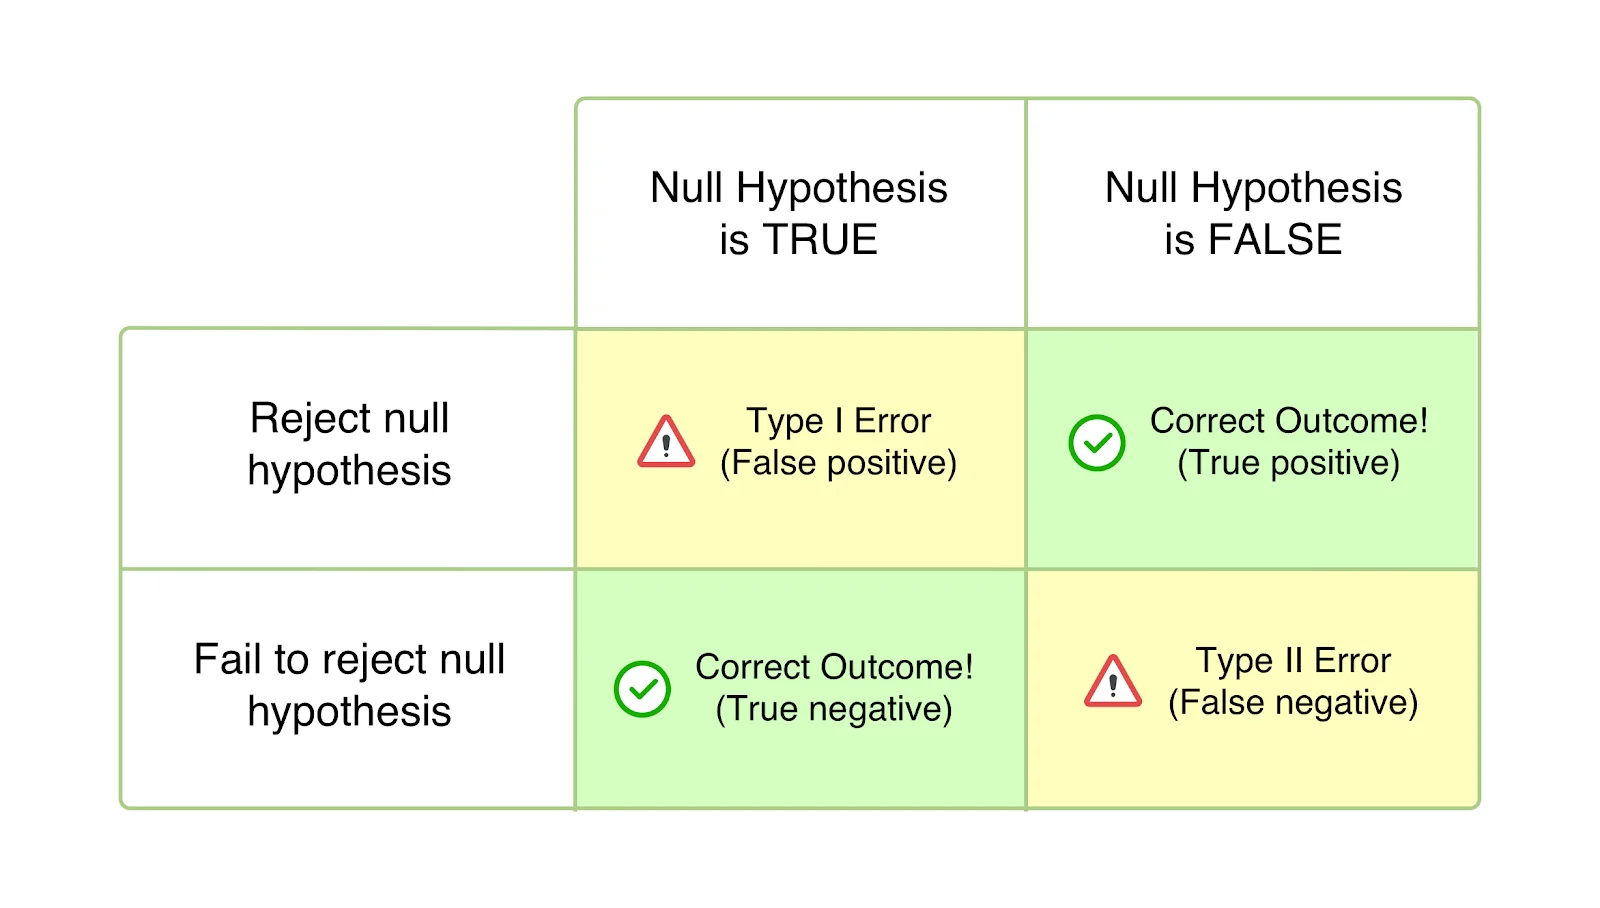

# Multiclass-Classification
# Digits

In [ ]:
from sklearn.datasets import load_digits
print('Done')

Done


In [ ]:
# Multiclass-Classification
# Binary: 1/0

#

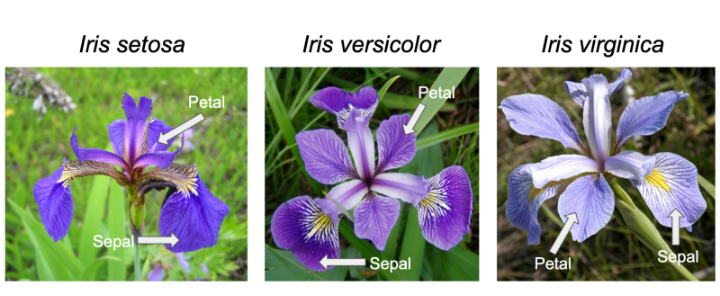

In [ ]:
# Build a ML Model that takes 4 features of iris Flower
# Sepal length
# Sepal width
# Petal length
# Petal Width
# Predict a flower class: Setosa, Versicolor, Virginica

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
flower_data = load_iris()
print('Done')

Done


In [ ]:
flower_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
print(flower_data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [ ]:
X = flower_data['data']
df = pd.DataFrame(X, columns = flower_data['feature_names'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y = flower_data['target']
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
target_class = flower_data['target_names']
target_class

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
df.shape

(150, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
df.describe().round(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [ ]:
df.corr().round(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.00,-0.12,0.87,0.82
sepal width (cm),-0.12,1.00,-0.43,-0.37
petal length (cm),0.87,-0.43,1.00,0.96
petal width (cm),0.82,-0.37,0.96,1.00


In [ ]:
# PCA: Principal Component Analysis: It a method or a technique to reduce n dimension features to two dimension

In [ ]:
dff = df.copy()
dff['target'] = y

dff['target_class'] = dff['target'].apply(lambda row: target_class[row])
dff

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_class
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


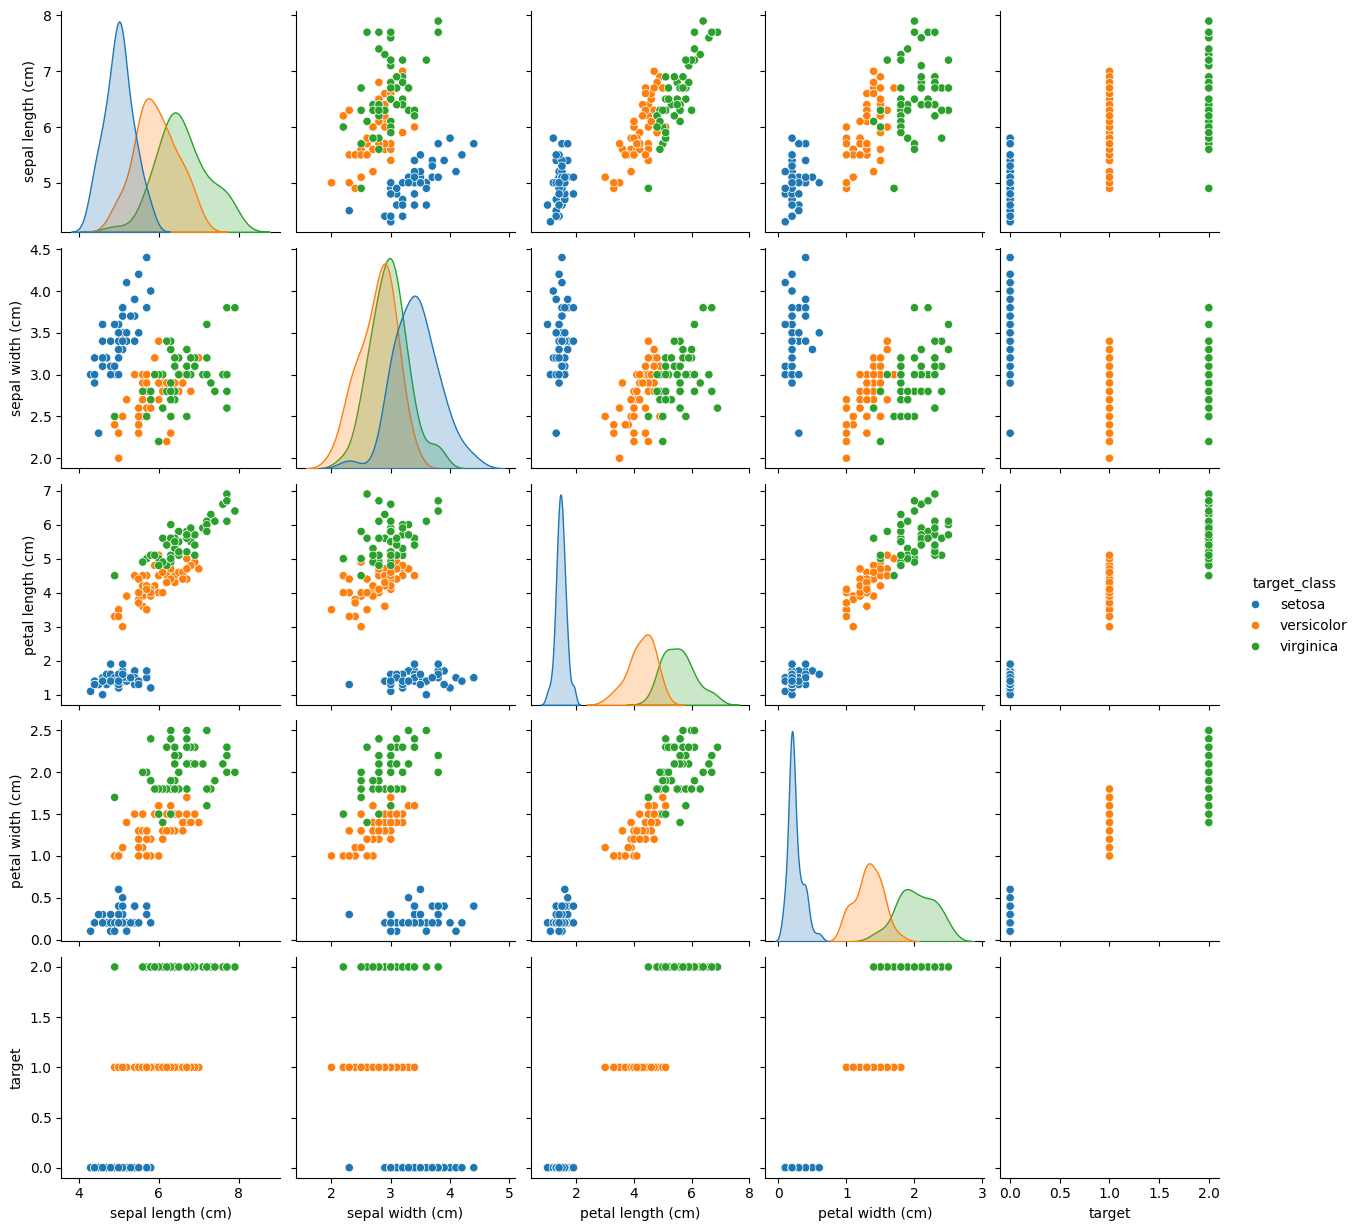

In [ ]:
sns.pairplot(dff, hue = 'target_class')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=4)

In [ ]:
print('X_train Shape',X_train.shape)
print('X_test Shape',X_test.shape)
print('y_train Shape',y_train.shape)
print('y_test Shape',y_test.shape)

X_train Shape (120, 4)
X_test Shape (30, 4)
y_train Shape (120,)
y_test Shape (30,)


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
print(y_pred)

[2 0 2 2 2 1 2 0 0 2 0 0 0 1 2 0 1 0 0 2 0 2 1 0 0 0 0 0 0 2]


In [ ]:
y_test

array([2, 0, 2, 2, 2, 1, 1, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2])

In [ ]:
# training Score

model.score(X_train, y_train)

0.9833333333333333

In [ ]:
# testing Score

model.score(X_test, y_test)

0.9666666666666667

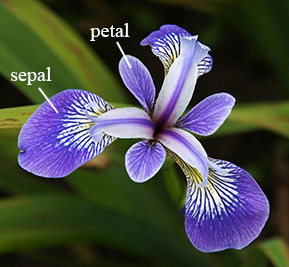

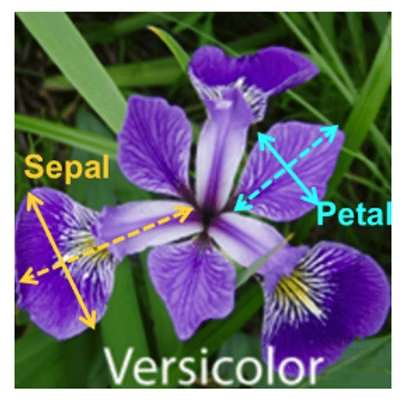

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[16,  0,  0],
       [ 0,  4,  1],
       [ 0,  0,  9]])

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report, precision_score

In [ ]:
accuracy_score(y_test, y_pred)

0.9666666666666667

In [ ]:
recall_score(y_test,y_pred, average='weighted')

0.9666666666666667

In [ ]:
f1_score(y_test,y_pred, average=None)

array([1.        , 0.88888889, 0.94736842])

In [ ]:
f1_score(y_test,y_pred, average='weighted')

0.9656920077972709

In [ ]:
f1_score(y_test,y_pred, average=None).mean()

np.float64(0.94541910331384)

In [ ]:
precision_score(y_test,y_pred,average='weighted')

0.9700000000000001

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.80      0.89         5
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.93      0.95        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
y_test.shape

(30,)

In [ ]:
# Website: stremlit, flask, Django, fastapi

In [ ]:
def predict_species():
  user_input = []
  for i in df:
    min_i,max_i = df[i].agg(['min','max']).values
    ans = float(input(f'Enter value of {i} min:{min_i} ~ max:{max_i} : '))
    user_input.append(ans)
  final_input = [user_input]
  flower_class = model.predict(final_input)[0]
  final_ans = target_class[flower_class]
  pb = round(model.predict_proba(final_input).max()*100,2)
  print()
  print(f'The Predicted Species is : {final_ans}')
  print(f'With Probability of {pb} %')

  for index,value in enumerate(model.predict_proba(final_input).flatten()):
    print(f'probability of {target_class[index]}',round(value*100,2), '%')
  import IPython

  display(IPython.display.Image(f'{final_ans}.png'))

Enter value of sepal length (cm) min:4.3 ~ max:7.9 : 3.5
Enter value of sepal width (cm) min:2.0 ~ max:4.4 : 2
Enter value of petal length (cm) min:1.0 ~ max:6.9 : 1
Enter value of petal width (cm) min:0.1 ~ max:2.5 : 0.1

The Predicted Species is : setosa
With Probability of 98.46 %
probability of setosa 98.46 %
probability of versicolor 1.54 %
probability of virginica 0.0 %


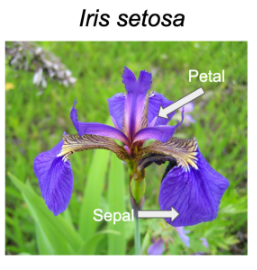

In [ ]:
predict_species()